## Benchmarking task - Classification task

Example notebook 
- model benchmarking: Nova-Micro and Haiku 3.5 for a classification task
- evaluation metric: 'Inference_Time','Input_Token','Output_Token','Throughput','Accuracy','BERT-P','BERT-R','BERT-F1','Toxicity','Cost','Cache_Input_Token','Cache_Output_Token'
- cost-performance analysis: cost-accuracy

#### Install python packages requested by benchmarking

If you have not install the requested python libraries, uncomment the following command to run the installation.

In [1]:
#!pip install -r ../peccyben/requirements.txt

#### Import libraries

In [2]:
import pandas as pd
import sys

sys.path.insert(0, '../')

from peccyben.classificationtask import Class_Ben 
from peccyben.utils import Ben_Save
from peccyben.promptcatalog import Prompt_Template_Gen

2025-04-01 23:45:16.446916: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-01 23:45:16.461150: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-01 23:45:16.480123: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-01 23:45:16.488059: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-01 23:45:16.501287: I tensorflow/core/platform/cpu_feature_guar

#### Configuration

Setup your environment parameters 

* **BENCH_KEY**: a unique keyname for your benchmarking in this round 
* **S3_BUCKET**: the S3 buckt you created for the benchmarking    
* **TASK_FOLDER**: the task folder you created under the S3 bucket   
* **INPUT_FILE**: the file name of the dataset you prepared for benchmarking, upload to S3 bucket    
* **METRICS_LIST**: the metrics we provide for the text classification task   
* **BEDROCK_REGION**: the AWS region that the model benchmarking runs on Bedrock
* **COST_FILE**: the price file used for calculating model inference cost   

In [3]:
BENCH_KEY = 'PeccyBen_202503_test'
S3_BUCKET = 'genai-sdo-llm-ben-20240310'
TASK_FOLDER = 'ben-class'
INPUT_FILE = 'agnews_16.csv'
METRICS_LIST = ['Inference_Time','Input_Token','Output_Token','Throughput','Accuracy','BERT-P','BERT-R','BERT-F1','Toxicity','Cost','Cache_Input_Token','Cache_Output_Token',]
BEDROCK_REGION = 'us-east-1'
COST_FILE = 'bedrock_od_public.csv'

Results_class = pd.DataFrame()
Results_class = Results_class.assign(metric_name=METRICS_LIST) 
Results_class = Results_class.set_index('metric_name')

#### Task specific setting

* Configure your **prompt** in the prompt catalog (prompt_catalog.json), and configure the prompt_catalog_id
* Set the **LLM hyperparameter** in model_kwargs. For the models on Bedrock, refer to [inferenceConfig](https://docs.aws.amazon.com/bedrock/latest/userguide/conversation-inference-call.html)

In [4]:
prompt_catalog_id = "class-1"   

model_kwargs = {
        'maxTokens': 512, 
        'topP': 0.9, 
        'temperature': 0
}   

#### Specify the model and other settings for benchmarking

Invoke **Class_Ben** function to conduct the benchmarking for one selected model, repeat for multiple models you want to benchmark

* **method**: set "Bedrock" for the models on Bedrock
* **region**: configured in the previous step
* **model_id**: specify the Model ID for the model endpoint
* **model_kwargs**: configured in previous step
* **prompt_template**: prompt template based on the prompt configured in previous step
* **s3_bucket**: configured in previous step
* **file_name**: configured in previous step
* **BENCH_KEY**: configured in previous step
* **task_folder**: configured in previous step
* **cost_key**: set "public" when using AWS public pricing to calculate the cost
* **save_id**: the model name displayed in the report 
* **SLEEP_SEC**: you can configure "sleep and retry" when throtting, for example, set SLEEP_SEC = 10 to wait for 10 seconds between each inference
* **SAMPLE_LEN**: you can configure the number of samples for inference
* **PP_TIME**: if you want to run model inference for multiple rounds, set the number of rounds here.  
* **cacheconf**: set "default" to enable Bedrock Prompt Caching in the inference, "None" to disable
* **latencyOpt**: set "optimized" to enable Bedrock Latency Optimized Inference, "None" to disable

In [5]:
# nova-micro
model_id = 'us.amazon.nova-micro-v1:0' 
save_id = 'nova-micro'

prompt_template = Prompt_Template_Gen(model_id, prompt_catalog_id)
#print(prompt_template)

Results_class[save_id] = Class_Ben(method="Bedrock",
                                   region=BEDROCK_REGION,
                                   model_id=model_id,
                                   model_kwargs=model_kwargs,
                                   prompt_template=prompt_template,
                                   s3_bucket=S3_BUCKET,
                                   file_name=INPUT_FILE,
                                   BENCH_KEY=BENCH_KEY,
                                   task_folder=TASK_FOLDER,
                                   cost_key=COST_FILE,
                                   save_id=save_id,
                                   SLEEP_SEC=2,SAMPLE_LEN=2,
                                   PP_TIME=2,
                                   cacheconf="None",latencyOpt="None")

Results_class

0 - 0|<category>sports news</category>


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


0 - 1|<category>science and technology news</category>


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


1 - 0|<category>sports news</category>


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


1 - 1|<category>science and technology news</category>


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Evaluation completed, saving the results... Result file saved.


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


,nova-micro
metric_name,
Inference_Time,0.819000
Input_Token,800.000000
Output_Token,36.000000
Throughput,177.959157
Accuracy,1.000000
BERT-P,0.778389
BERT-R,0.886825
BERT-F1,0.829075
Toxicity,0.000706


In [6]:
# Claude 3.5 Haiku
model_id = 'us.anthropic.claude-3-5-haiku-20241022-v1:0' 
save_id = 'Haiku-3.5'

prompt_template = Prompt_Template_Gen(model_id, prompt_catalog_id)
#print(prompt_template)

Results_class[save_id] = Class_Ben(method="Bedrock",
                                   region=BEDROCK_REGION,
                                   model_id=model_id,
                                   model_kwargs=model_kwargs,
                                   prompt_template=prompt_template,
                                   s3_bucket=S3_BUCKET,
                                   file_name=INPUT_FILE,
                                   BENCH_KEY=BENCH_KEY,
                                   task_folder=TASK_FOLDER,
                                   cost_key=COST_FILE,
                                   save_id=save_id,
                                   SLEEP_SEC=2,SAMPLE_LEN=2,
                                   PP_TIME=2,
                                   cacheconf="None",latencyOpt="optimized")

Results_class

0 - 0|sports news


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


0 - 1|science and technology news


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


1 - 0|sports news


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


1 - 1|science and technology news


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Evaluation completed, saving the results... Result file saved.


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


,nova-micro,Haiku-3.5
metric_name,,
Inference_Time,0.819000,2.644000
Input_Token,800.000000,886.000000
Output_Token,36.000000,24.000000
Throughput,177.959157,46.691816
Accuracy,1.000000,1.000000
BERT-P,0.778389,1.000000
BERT-R,0.886825,1.000000
BERT-F1,0.829075,1.000000
Toxicity,0.000706,0.000681


#### Generate benchmarking report

Invoke **Ben_Save** function to generate your benchmarking report and cost-performance analysis, all the results are stored in S3 bucket

* **Results_qa**: the benchmarking results generated in previous step
* **S3_BUCKET**: configured in previous step
* **BENCH_KEY**: configured in previous step
* **TASK_FOLDER**: configured in previous step
* **perf_metric**: select the performance metric from the metrics list in the previous step, for cost-performance analysis, for example, to analyze the accuracy score with cost, set "Accuracy".  
* **top_x**: set the top x number of models you want to run the cost-performance analysis 
* **TITLE**: specify a title for the reports and charts

/home/sagemaker-user/peccyben_test_public/../peccyben/utils.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(llm_list,rotation = 90)


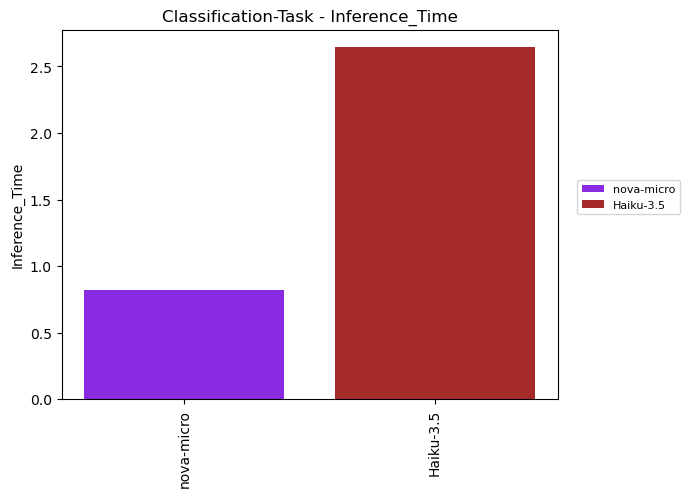

/home/sagemaker-user/peccyben_test_public/../peccyben/utils.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(llm_list,rotation = 90)


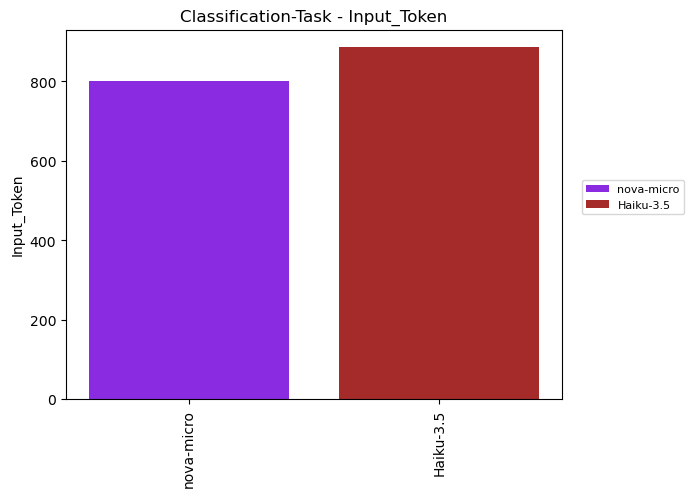

/home/sagemaker-user/peccyben_test_public/../peccyben/utils.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(llm_list,rotation = 90)


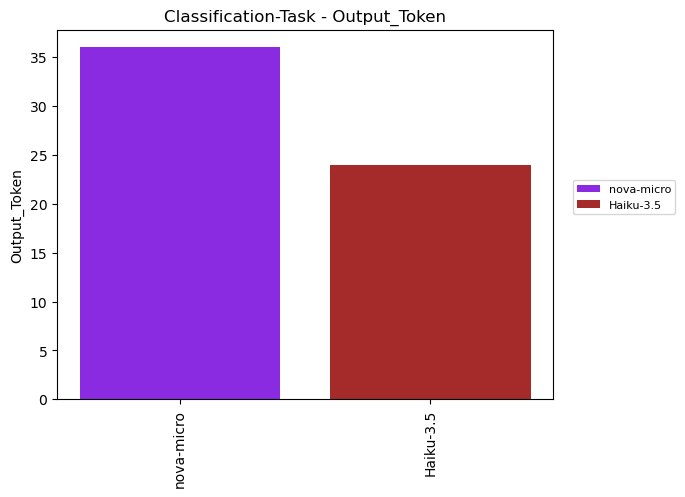

/home/sagemaker-user/peccyben_test_public/../peccyben/utils.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(llm_list,rotation = 90)


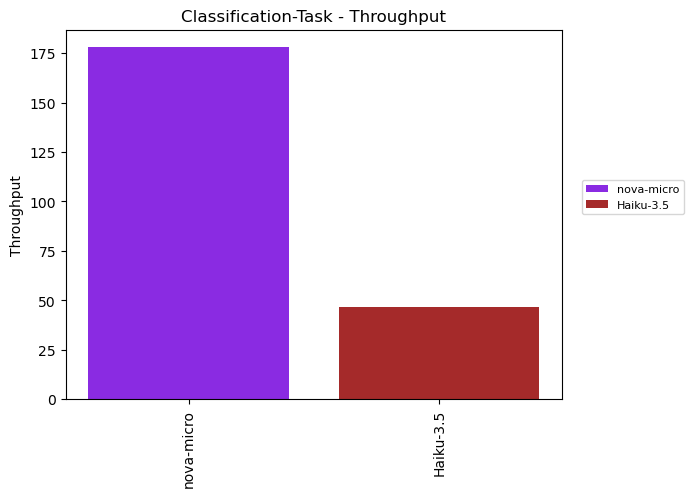

/home/sagemaker-user/peccyben_test_public/../peccyben/utils.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(llm_list,rotation = 90)


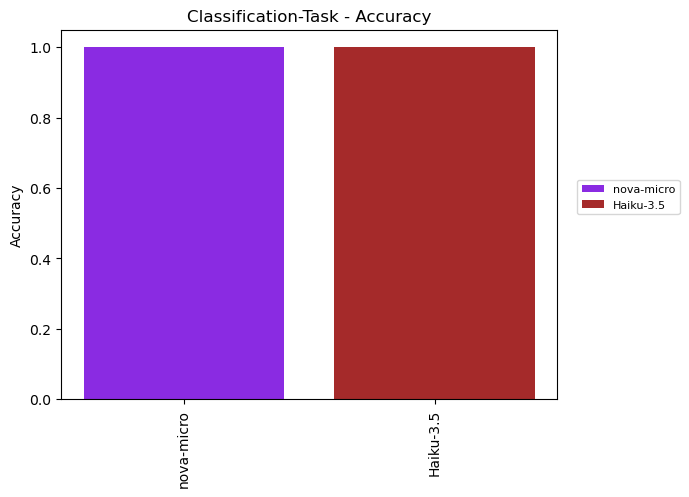

/home/sagemaker-user/peccyben_test_public/../peccyben/utils.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(llm_list,rotation = 90)


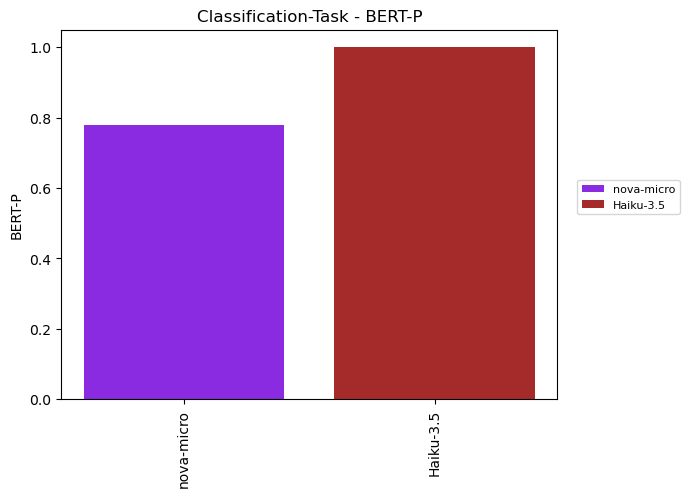

/home/sagemaker-user/peccyben_test_public/../peccyben/utils.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(llm_list,rotation = 90)


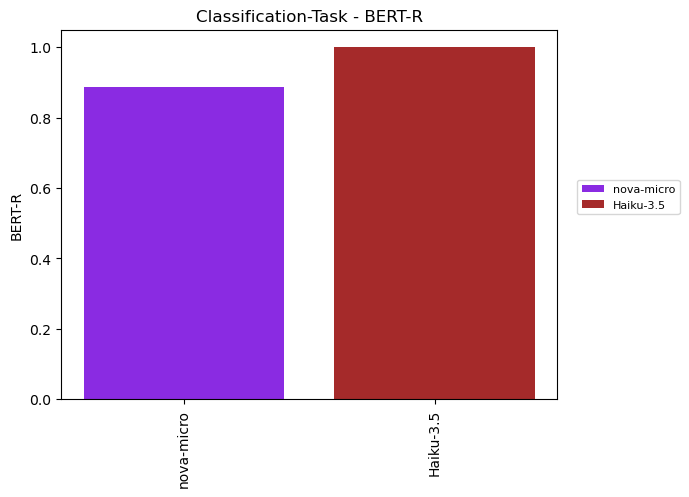

/home/sagemaker-user/peccyben_test_public/../peccyben/utils.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(llm_list,rotation = 90)


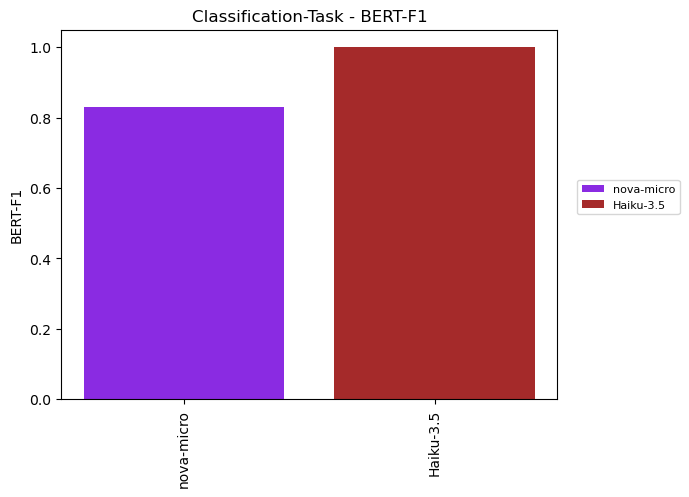

/home/sagemaker-user/peccyben_test_public/../peccyben/utils.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(llm_list,rotation = 90)


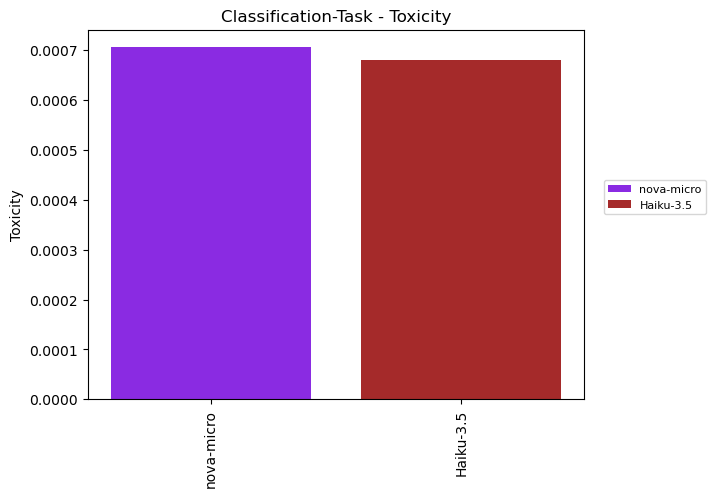

/home/sagemaker-user/peccyben_test_public/../peccyben/utils.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(llm_list,rotation = 90)


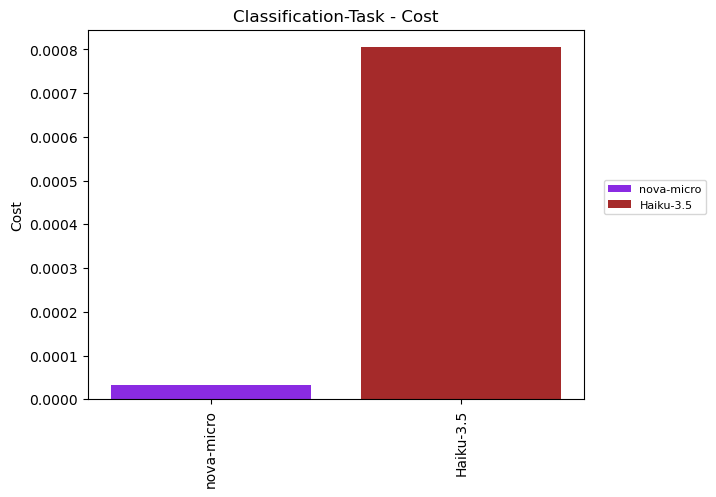

/home/sagemaker-user/peccyben_test_public/../peccyben/utils.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(llm_list,rotation = 90)


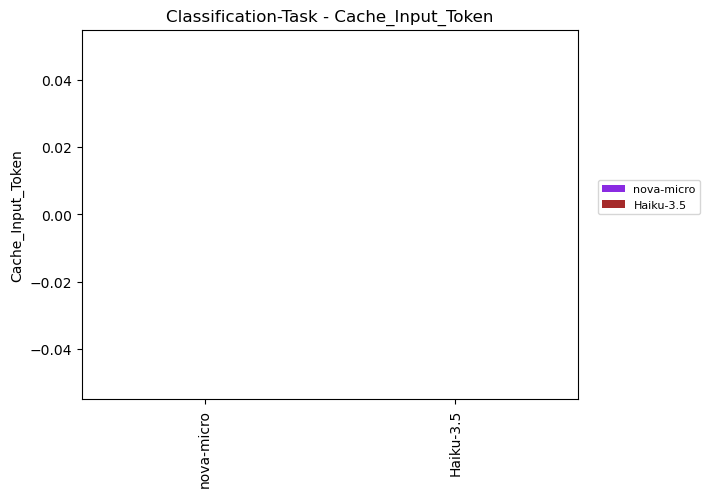

/home/sagemaker-user/peccyben_test_public/../peccyben/utils.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(llm_list,rotation = 90)


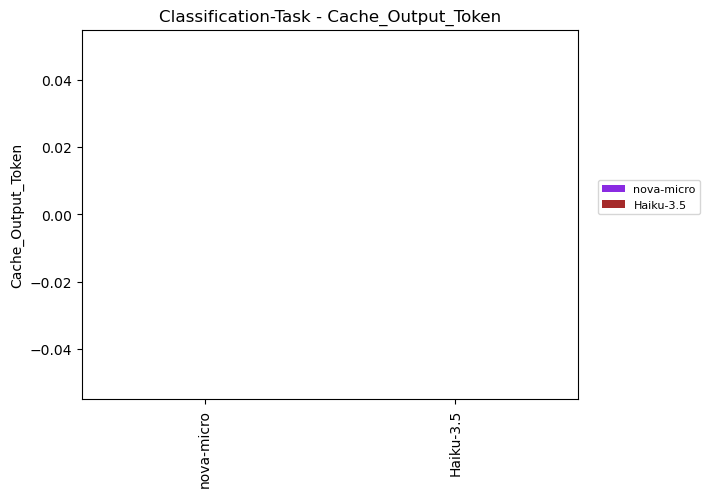

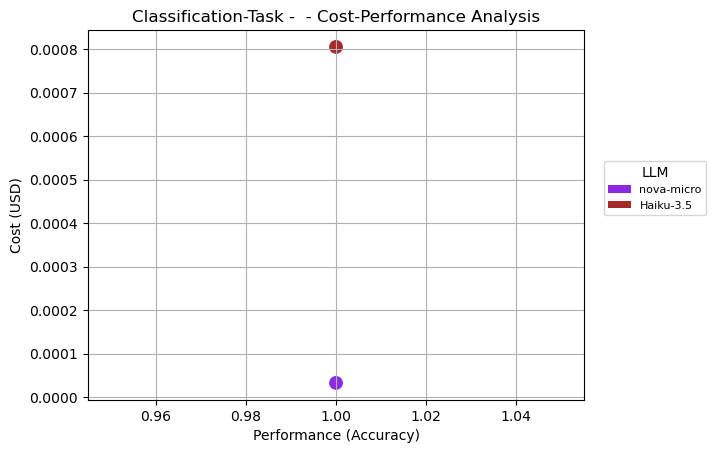

=== df_cp ===
 metric_name  Inference_Time  Input_Token  Output_Token  Throughput  Accuracy  \
nova-micro            0.819        800.0          36.0  177.959157       1.0   
Haiku-3.5             2.644        886.0          24.0   46.691816       1.0   

metric_name    BERT-P    BERT-R   BERT-F1  Toxicity      Cost  \
nova-micro   0.778389  0.886825  0.829075  0.000706  0.000033   
Haiku-3.5    1.000000  1.000000  1.000000  0.000681  0.000805   

metric_name  Cache_Input_Token  Cache_Output_Token     cost_perf  
nova-micro                 0.0                 0.0  30266.343826  
Haiku-3.5                  0.0                 0.0   1242.544732  


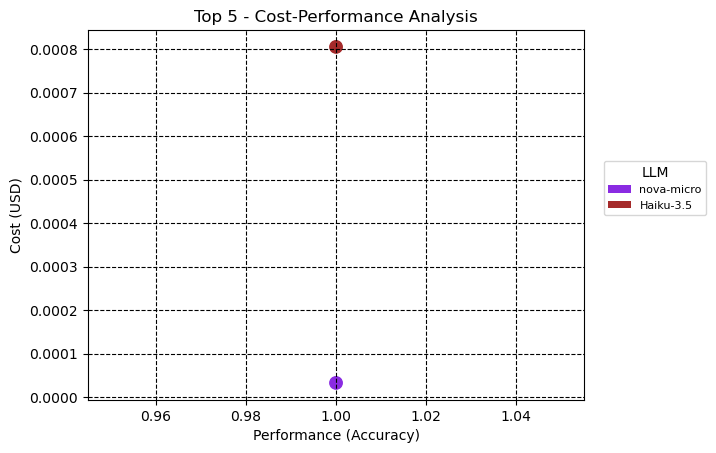

nova-micro    30266.343826
Haiku-3.5      1242.544732
Name: cost_perf, dtype: float64

Uploading benchmark metrics ...
Uploading benchmark graphs ... :0|1|2|3|4|5|6|7|8|9|10|11|12|
Uploading cost-performance graphs ... :
Benchmark output upload completed.


In [7]:
perf_metric = 'Accuracy'
top_x = 5

Ben_Save(Results_class,S3_BUCKET,BENCH_KEY,TASK_FOLDER,perf_metric,top_x,TITLE="Classification-Task")  